# Biodiversity Analysis Across National Parks In The USA

## Introduction

Biodiversity is a term used to describe the vast collection of life and its variabilities here on planet Earth. For this project, biodiversity data obtained from the National Parks Service will be analyzed in order to learn more about endangered species in various national parks. More specifically, data analysis will be performed on the conservation statuses of the species to find out if there are any patterns or themes present among the endangered. 

During this project, the data will be processed, analyzed, and visually plotted to help answer the following questions posed:
- What is the distribution of conservation status?
- Are certain types of animal categories more likely to be endangered?
- Are differences between species and conservation statuses significant?
- Which park contains the highest population of endangered species?

**<u>Source:</u>**

*All data has been gracefully provided by [Codecademy.com](www.codecademy.com) for the purpose of this project. Note that the data is *inspired* by real life applications but is mostly fictional.*

## Import Python Modules

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Load Data

In [2]:
# load the csv datas
df_species = pd.read_csv('species_info.csv')
df_obs = pd.read_csv('observations.csv')

<u>Species Information</u>

The number of columns in `df_species` is four and the names of these columns are: **category**, **scientific_name**, **common_names**, and **conservation_status**. 

In [3]:
print(df_species.columns)
df_species.head()

Index(['category', 'scientific_name', 'common_names', 'conservation_status'], dtype='object')


,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN
1,Mammal,Bos bison,"American Bison, Bison",NaN
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",NaN
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",NaN
4,Mammal,Cervus elaphus,Wapiti Or Elk,NaN


<u>Observations</u>

The number of columns in `df_obs` is three and the names of these columns are: **scientific_name**, **park_name**, and **observations**.

In [4]:
print(df_obs.columns)
df_obs.head()

Index(['scientific_name', 'park_name', 'observations'], dtype='object')


,scientific_name,park_name,observations
0,Vicia benghalensis,Great Smoky Mountains National Park,68
1,Neovison vison,Great Smoky Mountains National Park,77
2,Prunus subcordata,Yosemite National Park,138
3,Abutilon theophrasti,Bryce National Park,84
4,Githopsis specularioides,Great Smoky Mountains National Park,85


## Explore Data

<u>Species</u>

There are a total of 5842 entries for the first dataset. 

In [5]:
# preview of dataset
print(df_species.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5824 entries, 0 to 5823
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   category             5824 non-null   object
 1   scientific_name      5824 non-null   object
 2   common_names         5824 non-null   object
 3   conservation_status  191 non-null    object
dtypes: object(4)
memory usage: 182.1+ KB
None


In the `category` column, it would be useful to find the number and names of animal categories present in the dataset. 

To obtain the results, let us use the following methods:

In [6]:
# Count number of unique categories
print(df_species['category'].nunique())

7


In [7]:
# Display names of unique categories
print(df_species['category'].unique())

['Mammal' 'Bird' 'Reptile' 'Amphibian' 'Fish' 'Vascular Plant'
 'Nonvascular Plant']


Using the pandas module, the total number of animal categories is 7 and the animals are separated into the following categories: **Mammal, Bird, Reptile, Amphibian, Fish, Vascular Plant,** and **Nonvascular Plant.**

<u>Observations</u>

In the observations dataset, there is a column designated for the various national parks where the animals were observed. To find the names of the parks listed, the following method was used. The results show four unique parks with the following names: **Great Smoky Mountains National Park, Yosemite National Park, Bryce National Park,** and **Yellowstone National Park**.

In [8]:
# Count number of unique parks
print(df_obs['park_name'].unique())

['Great Smoky Mountains National Park' 'Yosemite National Park'
 'Bryce National Park' 'Yellowstone National Park']


Next, the total number of observations was obtained by summing all of values in the observation column. The total number of observations was 3314739.

In [9]:
# Count total number of observations
print(df_obs['observations'].sum())

3314739


## Analysis

**Distribution of Conservation Status**

To find the distribution of the conservation status, we can first examine the `conservation_status` column more closely. A frequency table was created in order to find the unique names and counts for each conservation status. The statuses found include: 
- Species of concern
- Endangered 
- Threatened
- In recovery
- Nan

In [10]:
# Find unique values in conservation_status column
df_species['conservation_status'].value_counts(dropna=False)

NaN                   5633
Species of Concern     161
Endangered              16
Threatened              10
In Recovery              4
Name: conservation_status, dtype: int64

Notice the significantly large number of null values that were found in the dataset, there were 5633 NaN values! This will impact the distribution of `conservation_status` so the null values will be excluded. In addition, to provide consistency with the naming of the statuses, the 'NaN' value was replaced with 'No Contact'. 

In [84]:
# Fill all null values with 'No Contact' status
df_species['conservation_status'].fillna('No Contact', inplace=True)
df_species.head(10)

,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,No Contact
1,Mammal,Bos bison,"American Bison, Bison",No Contact
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",No Contact
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",No Contact
4,Mammal,Cervus elaphus,Wapiti Or Elk,No Contact
5,Mammal,Odocoileus virginianus,White-Tailed Deer,No Contact
6,Mammal,Sus scrofa,"Feral Hog, Wild Pig",No Contact
7,Mammal,Canis latrans,Coyote,Species of Concern
8,Mammal,Canis lupus,Gray Wolf,Endangered
9,Mammal,Canis rufus,Red Wolf,Endangered


Now, the `conservation_status` column is preprocessed for all values including null values and ready for visualization. Since the values found inside `conservation status` are categorical, a histogram will be used to plot the frequency of each status. As stated previously, due to the high frequency of 'No Contact' statuses, the histogram will exclude all null values. In order to do this, we will first create a new variable excluding the 'No Contact' values.

According to the diagram, the histogram is skewed to the right, meaning that most data can be found on the left-hand side. Most observations can be classified as 'Species of Concern', which can provide experts with species for concentration to prevent further endangerment risks.

In [ ]:
# create category variable for plot
conservationCategories = df_species[df_species['conservation_status'] != 'No Contact']

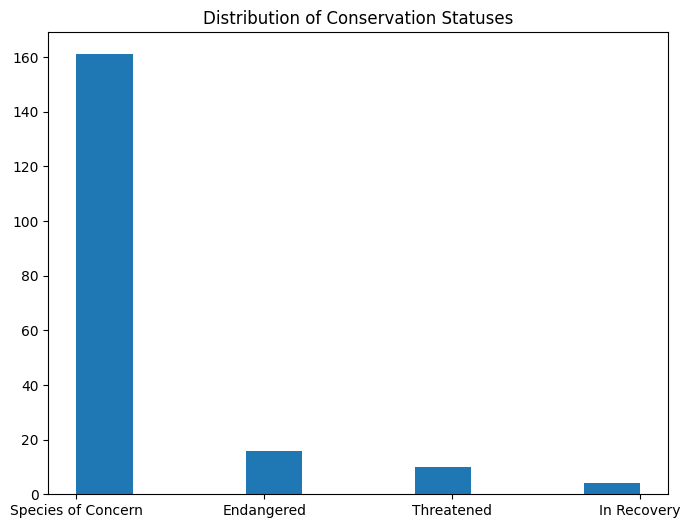

<Figure size 640x480 with 0 Axes>

In [102]:
# plot histogram of conservationCategories
plt.figure(figsize=(8, 6))

plt.hist(cs_no_null['conservation_status'])
plt.title("Distribution of Conservation Statuses")
plt.show()
plt.clf()

**Bivariate Analysis of Animal Categories and Conservation Status**

Next, we would like to examine if certain types of animal categories are more likely to be endangered. First, the proportions of each animal category for each conservation status was discovered.

In [106]:
conservation_prop = df_species.groupby(['conservation_status','category'])['common_names'].count().unstack()
conservation_prop = conservation_prop.reindex()

conservationCategories

category,Amphibian,Bird,Fish,Mammal,Nonvascular Plant,Reptile,Vascular Plant
conservation_status,,,,,,,
Endangered,1.0,4.0,3.0,7.0,NaN,NaN,1.0
In Recovery,NaN,3.0,NaN,1.0,NaN,NaN,NaN
No Contact,73.0,442.0,116.0,176.0,328.0,74.0,4424.0
Species of Concern,4.0,72.0,4.0,28.0,5.0,5.0,43.0
Threatened,2.0,NaN,4.0,2.0,NaN,NaN,2.0


**Statistical Significance**

**Park Analysis**

## Conclusion

## Additional Notes